<a href="https://colab.research.google.com/github/davidmuna/KNN-Naive-Bayes-Classifiers/blob/main/Core_Week_9_Naive_Bayes_Classifier_David_Muna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Naive Bayes Classifier

## 1. Defining the Question



### a) Specifying the Data Analytic Question

We want to classify/predict whether emails are spam or not.




### b) Defining the Metric for Success

Successfully classifying emails as either spam or not with an accuracy of correct predictions not less than 80% using the following model and metrics:



*   Multinomial Naive Bayes 
*   Multinomial Naive Bayes Laplace Correction
*   Selecting the best test_size
*   Accuracy of correct predictions
*   Reporting confusion matrix

### c) Understanding the context 

In todays world, may organisations and individuals dread unsolicited spam messages as this is a source of distraction which infringe on peoples privacy and preferences in email content by violating the principles of personal loyalty and legitimacy of consumer data collection. Therefore, its imperative that emails be classsified as either spam or not.

### d) Recording the Experimental Design



*   Data Preparation and Cleaning
*   Exploratory Data Analysis and Normality Tests
*   Modelling
*   Improving Model Performance
*   Evaluation




### e) Data Relevance

Our data becomes relevant once we achieve the metrics for success.

## 2. Reading the Data

In [213]:
# Loading the Data from the source i.e. csv
# ---
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Filtering Warnings
import warnings
warnings.simplefilter("ignore")

data = pd.read_csv('/content/spambase.data')



## 3. Checking the Data

##### Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

In [129]:
# Determining the no. of records in our dataset
print('data',data.shape)

data (4600, 58)


In [130]:
# Previewing the top of our datasets
data.head(3)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1


In [131]:
# Previewing the bottom of our datasets
data.tail(3)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4597,0.30,0.0,0.30,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [132]:
# Checking whether each column has an appropriate datatype
data.dtypes

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      float64
3.756     float64
61        

## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

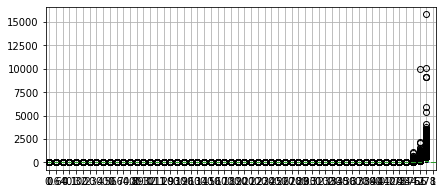

In [133]:
# Checking for Outliers
data.boxplot(figsize=(7,3))

The last few columns seem to have outliers. Lets preview them after renaming all columns.

In [134]:
data.columns = data.columns.str.replace('.', 'att')
data.columns = data.columns.str.replace('61', 'att61')
data.columns = data.columns.str.replace('278', 'att278')

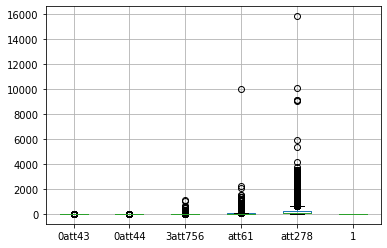

In [135]:

df = pd.DataFrame(data = data, columns = ['0att43','0att44','3att756', 'att61', 'att278', '1'])
df.boxplot()

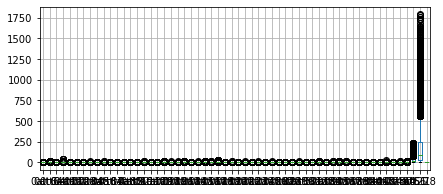

In [136]:
#Dealing with Outliers

#Dropping some of the points that seem to be outliers. Since theyre many, it means they may be part
#of our data hence meaningful. For this reason, the quantiles used for removing some of the outliers
# will be the 10th and 90th quantiles

Q1 = data[['3att756', 'att61', 'att278', '1']].quantile(0.10)
Q3 = data[['3att756', 'att61', 'att278', '1']].quantile(0.90)
IQR = Q3 - Q1

#creating a new variable to store our data that has no outliers
data1 = data[~((data > (Q3 + 1.5 * IQR)))]
data1.boxplot(figsize=(7,3))

In [137]:
# Checking for Anomalies
data1.nunique()

#Everything seems to be okay, no anomalies

0              142
0att64         171
0att64att1     214
0att1           43
0att32         255
0att2          141
0att3          173
0att4          170
0att5          144
0att6          245
0att7          113
0att64att2     316
0att8          158
0att9          133
0att10         118
0att32att1     253
0att11         197
1att29         229
1att93         575
0att12         148
0att96         401
0att13          99
0att14         164
0att15         143
0att16         395
0att17         281
0att18         240
0att19         200
0att20         156
0att21         179
0att22         128
0att23         106
0att24         184
0att25         110
0att26         177
0att27         159
0att28         188
0att29          53
0att30         163
0att31         125
0att32att2     108
0att33         186
0att34         136
0att35         160
0att36         230
0att37         227
0att38          38
0att39         106
0att40         313
0att41         641
0att42         225
0att778        963
0att43      

In [139]:
# Identifying the Missing Data
data1.isnull().sum()

0               0
0att64          0
0att64att1      0
0att1           0
0att32          0
0att2           0
0att3           0
0att4           0
0att5           0
0att6           0
0att7           0
0att64att2      0
0att8           0
0att9           0
0att10          0
0att32att1      0
0att11          0
1att29          0
1att93          0
0att12          0
0att96          0
0att13          0
0att14          0
0att15          0
0att16          0
0att17          0
0att18          0
0att19          0
0att20          0
0att21          0
0att22          0
0att23          0
0att24          0
0att25          0
0att26          0
0att27          0
0att28          0
0att29          0
0att30          0
0att31          0
0att32att2      0
0att33          0
0att34          0
0att35          0
0att36          0
0att37          0
0att38          0
0att39          0
0att40          0
0att41          0
0att42          0
0att778         0
0att43          0
0att44          0
3att756       132
att61     

In [140]:
#Dealing with missing data
data1 = data1.dropna()

new shape (4296, 58)


In [143]:
# Checking for Duplicates in the set
print('Duplicates', data1.duplicated().sum())
data1 = data1.drop_duplicates()
print('Duplicates', data1.duplicated().sum())
data1.shape

Duplicates 358
Duplicates 0


(3938, 58)

## 6. Exploratory Analysis 

Conducting Normality tests using QQ Plot and Shapiro Wilk Test

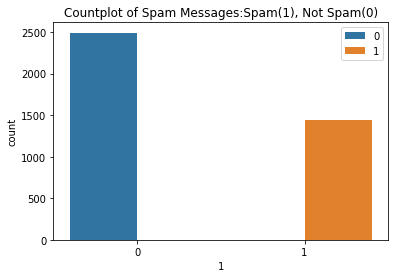

In [180]:
#Countplot of Spam Messages

sns.countplot(x="1", data=data1, hue = '1')
plt.title('Countplot of Spam Messages:Spam(1), Not Spam(0)')
plt.legend()

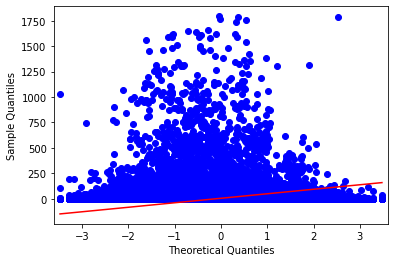

In [153]:
#Checking for normality in our data
from statsmodels.graphics.gofplots import qqplot as qq

# q-q plot
qq(data1, line='s')
plt.show()

Our data doesnt seem to be normally distributed.

In [214]:
# importing the shapiro library
from scipy.stats import shapiro 

# testing for normality
stat, p = shapiro(data1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.063, p=0.000
Sample does not look Gaussian


## 7. Implementing the Solution

##### Baseline Model

We will use the Multinomial Naive Bayes Classifier because it uses discrete counts of words in a document during text classification. Binomial was not chosen because its a binary form of classification on whether a word appears or not in a document(0 or 1). Gaussian Naive Bayes is also not suitable since it makes strong assumptions of normality which is not the case with our data.

In [161]:
#Splitting data into X and y
X = data1.drop(columns = ['1'])
y = data1['1']

from sklearn.model_selection import train_test_split

#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 0)

In [163]:
#Scaling data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [189]:
#Modelling using MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix


#creating our model
model = MultinomialNB().fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

#Checking metrics and evaluation
print(np.mean(y_pred == y_test))  #percentage of correct classification
print(confusion_matrix(y_pred , y_test))
baseline_accuracy = np.mean(y_pred == y_test) #for comparisons in the next models

0.8769035532994924
[[451  77]
 [ 20 240]]


The confusion matrix tells us we have 451 True Positive Predictions and 240 True Negative predictions

##### Optimisation

*   Applying ensembling, bagging and boosting techniques may not work because the Naive Bayes Classifier has no variance to minimize.

*   Our data has cases of Zero Freaquency. Therefore we can apply smoothing techniques such as Laplace or Lidstone Correction to improve performance or we can drop Highly Correlated Features.


*   In this case, we apply Laplace correction.

The smoothing priors alpha>=0 accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting alpha = 1 is called Laplace smoothing, while alpha<1 is called Lidstone smoothing.








In [197]:
# Create correlation matrix
#corr_matrix = data1.corr().abs()

# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop Highly correlated features 
#data2 = data1.drop(columns=to_drop, axis=1)
#data2.shape

(3938, 57)

In [220]:
#Splitting data into X and y
X = data2.drop(columns = ['1'])
y = data2['1']

#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 0)

#Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Modelling using MultinomialNB
model = MultinomialNB(alpha=1).fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

#Checking metrics and evaluation
print(np.mean(y_pred == y_test))  #percentage of correct classification
print(confusion_matrix(y_pred , y_test))
new_accuracy = np.mean(y_pred == y_test) 
print('After Laplace Smoothing, Accuracy Improvement is {:0.2f}%.'.format( 100 * (new_accuracy - baseline_accuracy) / baseline_accuracy))

0.8743654822335025
[[452  80]
 [ 19 237]]
After Laplace Smoothing, Accuracy Improvement is -0.29%.


Tuned Model Performs slightly worse than Baseline Model. We stick to Baseline Model. Matrix Reaveals 452 True Positive predictions and 237 True Negative Predictions.

##### Changing test_size to 30 and 40

i.e. Using Baseline Model

In [221]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 0)

#Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Modelling using MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

#Checking metrics and evaluation
print(np.mean(y_pred == y_test))  #percentage of correct classification
print(confusion_matrix(y_pred , y_test))
new_accuracy = np.mean(y_pred == y_test) 
print('With test_size 0.3, Accuracy Improvement is {:0.2f}%.'.format( 100 * (new_accuracy - baseline_accuracy) / baseline_accuracy))

0.8764805414551607
[[700 116]
 [ 30 336]]
With test_size 0.3, Accuracy Improvement is -0.05%.


Matrix reveals 700 true positive predictions and 336 true negative predictions. Test_size of 0.3 reduces performance.

In [222]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .4, random_state = 0)

#Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Modelling using MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

#Checking metrics and evaluation
print(np.mean(y_pred == y_test))  #percentage of correct classification
print(confusion_matrix(y_pred , y_test))
new_accuracy = np.mean(y_pred == y_test) 
print('With test_size 0.4, Accuracy Improvement is {:0.2f}%.'.format( 100 * (new_accuracy - baseline_accuracy) / baseline_accuracy))

0.8794416243654822
[[937 149]
 [ 41 449]]
With test_size 0.4, Accuracy Improvement is 0.29%.


Matrix reveals 937 true positives and 449 true negatives. Therefore, the best and recommended test_size to choose for this dataset is 0.4 becasue it has fewer false positives/negatives and a slightly better accuracy score.

## 8. Challenging the solution

We should never allow our solution to hold the day. Therefore, to challenge our solution, we can use other models such as SVM or Random Forests to see whether they perform better on our dataset.

In [236]:
#importing additional model libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as sp
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Specifying our hyperparameters

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

#Splitting data with test_size 0.4

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .4, random_state = 0)

#Instantiating classifier to store classification models
classifier = []

#Appending different classification models to our classifier
classifier.append(('Random Forest ', RandomForestClassifier()))
classifier.append(('SVC ', SVC()))

##Hyperparameter tuning using Random search with 5 folds
random_search = RandomizedSearchCV(classifier, param_dist, cv = 5)

#instatiating empty lists to store model names and results
m_results =[]
names = []

#Looping the classification model and results
for name, model in classifier:
   kfold = KFold(n_splits=5, random_state=0)
   model_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
   m_results.append(model_results)
   names.append(name)
   print("%s: %f (%f)" % (name, model_results.mean(), model_results.std()))

Random Forest : 0.945806 (0.007432)
SVC : 0.715919 (0.021617)


From the results above, Random Forest seems to be an alternative model for use in this classification.

## 9. Follow up questions

### a). Did we have the right data?

The data was right and substantial.

### b). Do we need other data to answer our question?

No.

### c). Did we have the right question?

There was no question but the question would be, classyfying whether an email message is spam or not.

#### Conclusion

In conclusion, the Multinomial Naive Bayes Baseline Model performed better with a test_size of 0.4. However, upon challenging the solution, it would be good to also model our data and perform classification using Random Forest.